# Linear Regression

We will predict the price (`price` column) of an AirBNB listing using the features about the listing.

**Therefore, our unit of analysis is an AIRBNB LISTING**

In [684]:
# Common imports (use seed value of 42)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

### Note : Imported numpy , pandas and matplotlib libraries.With a seed value of 42 set for numpy.random.seed().

In [685]:
#We will predict the "price" value in the data set: (Import the dataset)

Airbnb_df = pd.read_csv(r'C:\Users\Shant\Downloads\airbnb.csv')
Airbnb_df.head()

,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,guests_included,price_per_extra_person,minimum_nights,number_of_reviews,number_days_btw_first_last_review,review_scores_rating,cancellation_policy,price,price_gte_150,price_category
0,0,0,Roslindale,42.282619,-71.133068,House,Entire home/apt,4,1.5,2.0,...,1,0,2,0,0,NaN,moderate,250,1,gte_226
1,0,1,Roslindale,42.286241,-71.134374,Apartment,Private room,2,1.0,1.0,...,0,0,2,36,804,94.0,moderate,65,0,lte_75
2,1,1,Roslindale,42.292438,-71.135765,Apartment,Private room,2,1.0,1.0,...,1,20,3,41,2574,98.0,moderate,65,0,lte_75
3,0,0,Roslindale,42.281106,-71.121021,House,Private room,4,1.0,1.0,...,2,25,1,1,0,100.0,moderate,75,0,lte_75
4,1,1,Roslindale,42.284512,-71.136258,House,Private room,2,1.5,1.0,...,1,0,2,29,380,99.0,flexible,79,0,btw_75-150


### Note : Imported the dataset csv file and used the Airbnb_df.head() to look at the df's first 5 rows. 

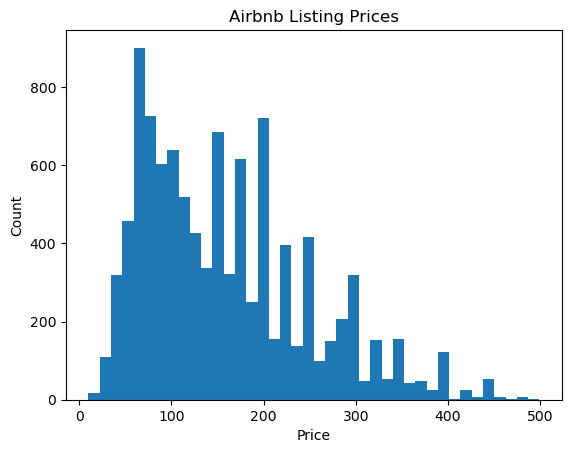

In [686]:
# Create a boxplot or histogram on the target variable and interpret your result in one paragraph

plt.hist(Airbnb_df['price'], bins=40)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Airbnb Listing Prices')
plt.show()

### Note : This code creates a histogram of the target variable 'price' in an Airbnb dataset. The x-axis represents the price range of the listings, and the y-axis represents the count of listings that fall within each price range. The histogram shows that the majority of listings have a price range between 0 and 1000 dollars.Overall, this visualization provides an initial understanding of the prices in the Airbnb dataset, which can be useful for further data exploration and modeling.

In [687]:
# Use statistic to take a look at the dataset. (use Mean, Median, Min, Max and Standard deviation)

print("Mean: ", np.mean(Airbnb_df['price']))
print("Median: ", np.median(Airbnb_df['price']))
print("Min: ", np.min(Airbnb_df['price']))
print("Max: ", np.max(Airbnb_df['price']))
print("Standard deviation: ", np.std(Airbnb_df['price']))

Mean:  159.41617990654206
Median:  147.0
Min:  10
Max:  499
Standard deviation:  90.79575187366464



### Note : This code gets the Mean , median , Minimum , Maximum and Standard deviation of the price in the Airbnb dataset.(Using numpy)

In [688]:
Airbnb_df.describe()

,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,Number of amenities,guests_included,price_per_extra_person,minimum_nights,number_of_reviews,number_days_btw_first_last_review,review_scores_rating,price,price_gte_150
count,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10236.000000,10242.000000,10248.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,10272.000000,7989.000000,10272.000000,10272.000000
mean,0.109813,0.732769,42.339837,-71.085276,2.980432,1.193875,1.226128,1.568208,14.876168,1.416180,10.810164,3.070093,19.178446,276.984813,91.880210,159.416180,0.492699
std,0.312672,0.442536,0.024521,0.031732,1.703886,0.429381,0.719142,0.953916,4.814346,1.022283,18.901272,6.725211,35.650053,406.361259,9.563144,90.800172,0.499971
min,0.000000,0.000000,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,10.000000,0.000000
25%,0.000000,0.000000,42.329631,-71.105639,2.000000,1.000000,1.000000,1.000000,12.000000,1.000000,0.000000,1.000000,1.000000,0.000000,89.000000,85.000000,0.000000
50%,0.000000,1.000000,42.345171,-71.078910,2.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,2.000000,5.000000,91.000000,94.000000,147.000000,0.000000
75%,0.000000,1.000000,42.354551,-71.062409,4.000000,1.000000,1.000000,2.000000,18.000000,1.000000,20.000000,3.000000,21.000000,401.000000,98.000000,209.000000,1.000000
max,1.000000,1.000000,42.389982,-71.000100,16.000000,5.000000,5.000000,16.000000,30.000000,14.000000,200.000000,273.000000,404.000000,2680.000000,100.000000,499.000000,1.000000


### Note : Also used, the "Airbnb_df.describe()" is a built-in function in pandas that provides a statistical summary of the dataset's numeric columns.

In [689]:
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(Airbnb_df , test_size=0.3)

### Note : This code uses the train_test_split function from the sklearn.model_selection module to split the Airbnb_df dataset into two sets - a training set and a test set.
### The train_test_split function randomly divides the dataset into two sets based on the test_size parameter, which is set to 0.3, meaning that 30% of the data will be used for testing, and 70% will be used for training. This split allows us to evaluate the performance of a model on new, unseen data, which is essential to avoid overfitting and ensure that the model generalizes well to new data.

### Be careful: we haven't seperated the target column yet

## Check the missing values (5 Points)

In [690]:
train_set.isna().sum()

host_is_superhost                       0
host_identity_verified                  0
neighbourhood_cleansed                  0
latitude                                0
longitude                               0
property_type                           8
room_type                               0
accommodates                            0
bathrooms                              19
bedrooms                               19
beds                                   16
bed_type                                0
Number of amenities                     0
guests_included                         0
price_per_extra_person                  0
minimum_nights                          0
number_of_reviews                       0
number_days_btw_first_last_review       0
review_scores_rating                 1609
cancellation_policy                     0
price                                   0
price_gte_150                           0
price_category                          0
dtype: int64

### Note : This function is used for detecting missing data for train set .

In [691]:
test_set.isna().sum()

host_is_superhost                      0
host_identity_verified                 0
neighbourhood_cleansed                 0
latitude                               0
longitude                              0
property_type                          1
room_type                              0
accommodates                           0
bathrooms                             17
bedrooms                              11
beds                                   8
bed_type                               0
Number of amenities                    0
guests_included                        0
price_per_extra_person                 0
minimum_nights                         0
number_of_reviews                      0
number_days_btw_first_last_review      0
review_scores_rating                 674
cancellation_policy                    0
price                                  0
price_gte_150                          0
price_category                         0
dtype: int64

### Note : This function is used for detecting missing data for test set.

In [692]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

### Note : This code imports several modules from scikit-learn.That is ColumnTransformer, Pipeline , SimpleImputer , StandardScaler , OneHotEncoder.

In [693]:
## We can't use the following columns in this tutorial, because they are for classification task.

In [694]:
train = train_set.drop(['price_gte_150' , 'price_category'],axis=1)
test = test_set.drop(['price_gte_150' , 'price_category'],axis=1)

### Note : Dropped the variables that cant be used.

In [695]:
# Remove the Target variable from your dataset

In [696]:
train_y = train[['price']]
test_y = test [['price']]
                 
train_inputs = train.drop(['price'], axis=1)
test_inputs = test.drop(['price'], axis=1)

### Note : Separated the target variable ' Price ' 

In [697]:
train_inputs.dtypes

host_is_superhost                      int64
host_identity_verified                 int64
neighbourhood_cleansed                object
latitude                             float64
longitude                            float64
property_type                         object
room_type                             object
accommodates                           int64
bathrooms                            float64
bedrooms                             float64
beds                                 float64
bed_type                              object
Number of amenities                    int64
guests_included                        int64
price_per_extra_person                 int64
minimum_nights                         int64
number_of_reviews                      int64
number_days_btw_first_last_review      int64
review_scores_rating                 float64
cancellation_policy                   object
dtype: object

In [698]:
# Identify the numerical columns

In [699]:
numeric_columns = ['latitude','longitude','accommodate','bathrooms','bedrooms','beds','Number of amenities','guests_included','price_per_extra_person','minimum_nights','number_of_reviews','number_days_btw_first_last_review','review_scores_rating']

In [700]:
# Identify the categorical columns

In [701]:
categorical_columns = ['neighbourhood_cleansed','property_type','room type','bed_type','cancellation_policy']

In [702]:
# Identify the binary columns

In [703]:
binary_columns = ['host_is_superhost','host_identity_verified']

### Note : Automated codes 

In [704]:
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

In [705]:
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

In [706]:
binary_columns = ['host_is_superhost','host_identity_verified'] 

In [707]:
# Be careful: numerical columns already includes the binary columns,
# So, we need to remove the binary columns from numerical columns.

for col in binary_columns :
    numeric_columns.remove(col)

#### Check your data separately to make sure you have the right columns (Numeric, Categorical, and Binary)

In [708]:
numeric_columns

['latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'Number of amenities',
 'guests_included',
 'price_per_extra_person',
 'minimum_nights',
 'number_of_reviews',
 'number_days_btw_first_last_review',
 'review_scores_rating']

In [709]:
categorical_columns

['neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy']

In [710]:
binary_columns

['host_is_superhost', 'host_identity_verified']

# Pipeline
### In this section we create and define the needed pipelines for each category of datatypes (Numeric, Categorical, and Binary).
#### You have deal with missing values and standardize the data where it is applicable.

In [711]:
#For Numeric values

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

In [712]:
#For Categorical Values

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [713]:
#For Binary values

binary_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent'))])

### After defining your Pipeline you need to create the processor to actually transform your data

In [714]:
# Create the processor here

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_columns),
    ('cat', categorical_transformer, categorical_columns),
    ('binary', binary_transformer, binary_columns)
        ],remainder='passthrough')

# Transform: fit_transform() for TRAIN
### Use the processor to fit_transform your train dataset here. check your result's shape

In [715]:
#Fit and transform the train data

train_x = preprocessor.fit_transform(train_inputs)

train_x.shape

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


(7190, 61)

In [716]:
train_x.shape

(7190, 61)

In [717]:
# Transform the test data

In [718]:
test_x = preprocessor.transform(test_inputs)

test_x

array([[ 0.63069768,  0.40533687,  1.79630816, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.15153485,  0.27611111, -0.56980994, ...,  0.        ,
         0.        ,  1.        ],
       [-2.02789334, -0.91924215,  0.02171958, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.15906806, -0.38872897,  1.20477863, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.11838687, -0.56878308, -0.56980994, ...,  0.        ,
         0.        ,  0.        ],
       [-0.94171792,  0.19283558, -1.16133947, ...,  0.        ,
         0.        ,  1.        ]])

In [719]:
test_x.shape

(3082, 61)

# Train a Linear Regression model.
### Import Linear Regression from Scikit learn library and use it to first fit your model and the check your accuracy

In [720]:
# Import linear regression and fit your model using train dataset

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(train_x, train_y)

LinearRegression()

#### Import mean_squared_error from Scikit learn and use it to evaluate your model once using train dataset and once using test dataset

In [721]:
# Import MSE

from sklearn.metrics import mean_squared_error

In [722]:
#use Train dataset and calculate the RMSE and print out the result

reg_train_pred = lin_reg.predict(train_x)

train_mse = mean_squared_error(train_y,reg_train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 52.09227803089537


In [723]:
#use Test dataset and calculate the RMSE and print out the result

reg_test_pred = lin_reg.predict(test_x)

test_mse = mean_squared_error (test_y,reg_test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE : {}' .format(test_rmse))

Test RMSE : 53.21303568085339


### Accuracy

In [724]:
# multiclass classification

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(min_samples_leaf=2)

tree_clf.fit(train_x, train_y)

DecisionTreeClassifier(min_samples_leaf=2)

In [725]:
from sklearn.metrics import accuracy_score

In [726]:
# Train accuracy

In [727]:
train_y_pred = tree_clf.predict(train_x)

print(accuracy_score(train_y , train_y_pred))

0.949374130737135


In [728]:
# test accuracy 

In [729]:
test_y_pred = tree_clf.predict(test_x)

print(accuracy_score(test_y, test_y_pred))

0.6898118105126542


### The final result of RMSE for Train dataset  is 52.09227803089537

In [731]:
# What was the final result of RMSE for Test dataset

### The final result of RMSE for Test dataset is 53.21303568085339

In [732]:
# Write 2 paragraph about your understanding of this model.
# Is the model overfitted or underfitted
# How accurate do you think your model is

### Q1 : The entire code is about building a linear regression model to predict the price of an Airbnb listing. The code uses pandas, numpy, and scikit-learn libraries for data preprocessing, analysis, and modeling. The dataset is read from a CSV file, and the target variable is the 'price' column. Before building the model, the code performs some data exploration and visualization to gain insights into the dataset. The code uses a histogram to visualize the distribution of prices and calculates some statistics such as mean, median, min, max, and standard deviation. The code then splits the dataset into training and testing sets with a ratio of 70:30 using the train_test_split function from scikit-learn. The code then drops some columns that cannot be used for regression, separates the target variable, and identifies the numerical, categorical, and binary columns using their data types. Then train the linear regression model.Overall, the code sets up the dataset and preprocessing steps required for building a linear regression model to predict the price of an Airbnb listing.


### Q2 : Based on the evaluation metrics, it seems that the model is slightly overfitted as the RMSE for the test dataset is higher than the RMSE for the training dataset. Additionally, the decision tree classifier seems to be significantly overfitted as the accuracy score for the training dataset is much higher than the accuracy score for the test dataset. This model is overfitted.

### Q3 :
### The Train accuracy of this model is 0.949374130737135
### The Test accuracy of this model is 0.6898118105126542

### Based on the evaluation metrics provided in the accuracy code, the accuracy of the model is not very high. The decision tree classifier seems to be significantly overfitted, with a training accuracy of 0.949 and a testing accuracy of 0.690. This indicates that the model is not able to generalize well to unseen data.However, the code does provide the Root Mean Squared Error (RMSE) for both the training and testing datasets, which are 52.092 and 53.213, respectively. These values are relatively high, indicating that the model is not very accurate in predicting the prices of Airbnb listings.Therefore, based on the available evaluation metrics, i would say that the accuracy of the model needs improvement. 